# Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

# Importing the data

In [2]:
train = pd.read_csv('../data/Train.csv')
test = pd.read_csv('../data/Test.csv')
submit = pd.read_csv('../data/SampleSubmission.csv')
variable = pd.read_csv('../data/VariableDefinitions.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
ID                        12079 non-null object
Policy Start Date         12079 non-null object
Policy End Date           12079 non-null object
Gender                    11720 non-null object
Age                       12079 non-null int64
First Transaction Date    12079 non-null object
No_Pol                    12079 non-null int64
Car_Category              8341 non-null object
Subject_Car_Colour        5117 non-null object
Subject_Car_Make          9603 non-null object
LGA_Name                  5603 non-null object
State                     5591 non-null object
ProductName               12079 non-null object
target                    12079 non-null int64
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 13 columns):
ID                        5177 non-null object
Policy Start Date         5177 non-null object
Policy End Date           5177 non-null object
Gender                    5021 non-null object
Age                       5177 non-null int64
First Transaction Date    5177 non-null object
No_Pol                    5177 non-null int64
Car_Category              3539 non-null object
Subject_Car_Colour        2172 non-null object
Subject_Car_Make          4116 non-null object
LGA_Name                  2395 non-null object
State                     2389 non-null object
ProductName               5177 non-null object
dtypes: int64(2), object(11)
memory usage: 525.9+ KB


In [5]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [6]:
train['target'].value_counts()

0    10624
1     1455
Name: target, dtype: int64

In [7]:
submit.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [8]:
variable

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


## Combining the test and train data

In [9]:
data = pd.concat([train, test], axis=0).reset_index(drop=True)

C:\Users\Chizurum_Olorondu\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 14 columns):
Age                       17256 non-null int64
Car_Category              11880 non-null object
First Transaction Date    17256 non-null object
Gender                    16741 non-null object
ID                        17256 non-null object
LGA_Name                  7998 non-null object
No_Pol                    17256 non-null int64
Policy End Date           17256 non-null object
Policy Start Date         17256 non-null object
ProductName               17256 non-null object
State                     7980 non-null object
Subject_Car_Colour        7289 non-null object
Subject_Car_Make          13719 non-null object
target                    12079 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.8+ MB


In [11]:
data.head(10)

,Age,Car_Category,First Transaction Date,Gender,ID,LGA_Name,No_Pol,Policy End Date,Policy Start Date,ProductName,State,Subject_Car_Colour,Subject_Car_Make,target
0,30,Saloon,2010-05-14,Male,0040R73,NaN,1,2011-05-13,2010-05-14,Car Classic,NaN,Black,TOYOTA,0.0
1,79,JEEP,2010-11-29,Female,0046BNK,NaN,1,2011-11-28,2010-11-29,Car Classic,NaN,Grey,TOYOTA,1.0
2,43,Saloon,2010-03-21,Male,005QMC3,NaN,1,2011-03-20,2010-03-21,Car Classic,NaN,Red,TOYOTA,0.0
3,2,NaN,2010-08-21,Male,0079OHW,NaN,1,2011-08-20,2010-08-21,CarSafe,NaN,NaN,NaN,0.0
4,20,NaN,2010-08-29,Entity,00BRP63,Lagos,3,2010-12-31,2010-08-29,Muuve,Lagos,NaN,NaN,1.0
5,37,NaN,2010-10-21,Male,00D3EF6,NaN,2,2011-10-20,2010-10-21,Car Classic,NaN,NaN,NaN,0.0
6,40,NaN,2010-08-02,Female,00HHZ8Y,Ikeja,3,2011-08-01,2010-08-02,CVTP,Lagos,NaN,NaN,0.0
7,43,Saloon,2010-09-12,Male,00M1X6U,NaN,1,2011-09-11,2010-09-12,CarSafe,NaN,NaN,TOYOTA,0.0
8,71,JEEP,2010-07-06,Female,00N7XT1,Badagry,2,2011-07-05,2010-07-06,Car Classic,Benue,Black,REXTON,0.0
9,58,NaN,2010-12-18,Female,00QF156,Eti-Osa,1,2011-12-17,2010-12-18,Car Classic,Eti-Osa,NaN,NaN,0.0


In [12]:
data.isna().sum()

Age                          0
Car_Category              5376
First Transaction Date       0
Gender                     515
ID                           0
LGA_Name                  9258
No_Pol                       0
Policy End Date              0
Policy Start Date            0
ProductName                  0
State                     9276
Subject_Car_Colour        9967
Subject_Car_Make          3537
target                    5177
dtype: int64

In [13]:
data['Car_Category'].value_counts()


Saloon                     8612
JEEP                       2868
Truck                       135
Bus                          66
Mini Bus                     55
Pick Up                      45
Motorcycle                   24
Sedan                        19
Mini Van                     18
Wagon                        13
Shape Of Vehicle Chasis       8
Station 4 Wheel               7
Van                           5
Pick Up > 3 Tons              3
Tipper Truck                  1
CAMRY CAR HIRE                1
Name: Car_Category, dtype: int64

In [14]:
data['ProductName'].value_counts()

Car Classic         9264
CarSafe             5385
Customized Motor     786
CVTP                 681
Car Plus             672
CarFlex              253
Muuve                148
Motor Cycle           61
Car Vintage            6
Name: ProductName, dtype: int64

## Identifying the various column types

In [15]:
date_col = ['Policy Start Date','Policy End Date','First Transaction Date']
num_col = ['Age']
cat_col = [col for col in test.columns if col not in date_col+num_col]

In [16]:
cat_col

['ID',
 'Gender',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [17]:
one = list(data['Policy Start Date'])
two = list(data['First Transaction Date'])

check = []

for x in range(len(one)):
    check.append((one[x], two[x]))

In [18]:
check2 = []
for x in check:
    if x[0] != x[1]:
        check2.append(x[0])

In [19]:
len(check2)

0

### This means that the Policy start date and First transactional date are equal so we should drop one of them

In [20]:
data['Subject_Car_Make'].value_counts()

TOYOTA            7099
Honda             1484
Lexus              856
Mercedes           754
Hyundai            654
Kia                484
Ford               402
Nissan             344
Volkswagen         177
Iveco              172
Range Rover        162
Mitsubishi         131
ACURA               96
Land Rover          92
BMW                 87
Peugeot             64
.                   63
Mazda               63
Mack                54
Volvo               50
Audi                41
Pontiac             37
Infiniti            36
Chevrolet           32
DAF                 27
Skoda               25
Jeep                24
Porsche             22
As Attached         17
Scania              15
                  ... 
Innson               3
Grand Cherokee       3
Hummer               3
Seat                 3
Wrangler Jeep        3
FOTON                3
Fiat                 2
KA                   2
MG                   2
Astra                2
Buik                 2
Jincheng             1
Datsun     

In [21]:

data['Car_Category'] = data['Car_Category'].fillna(value='Saloon')

data['Gender'] = data['Gender'].fillna(value='NOT STATED')

data['LGA_Name'] = data['LGA_Name'].fillna(value='Victoria Island')

data['State'] = data['State'].fillna(value='Lagos')

data['Subject_Car_Colour'] = data['Subject_Car_Colour'].fillna(value='Black')

data['Subject_Car_Make'] = data['Subject_Car_Make'].fillna(value='TOYOTA')

In [22]:
data.isna().sum()

Age                          0
Car_Category                 0
First Transaction Date       0
Gender                       0
ID                           0
LGA_Name                     0
No_Pol                       0
Policy End Date              0
Policy Start Date            0
ProductName                  0
State                        0
Subject_Car_Colour           0
Subject_Car_Make             0
target                    5177
dtype: int64

In [23]:
data['Car_Category'].value_counts()

Saloon                     13988
JEEP                        2868
Truck                        135
Bus                           66
Mini Bus                      55
Pick Up                       45
Motorcycle                    24
Sedan                         19
Mini Van                      18
Wagon                         13
Shape Of Vehicle Chasis        8
Station 4 Wheel                7
Van                            5
Pick Up > 3 Tons               3
Tipper Truck                   1
CAMRY CAR HIRE                 1
Name: Car_Category, dtype: int64

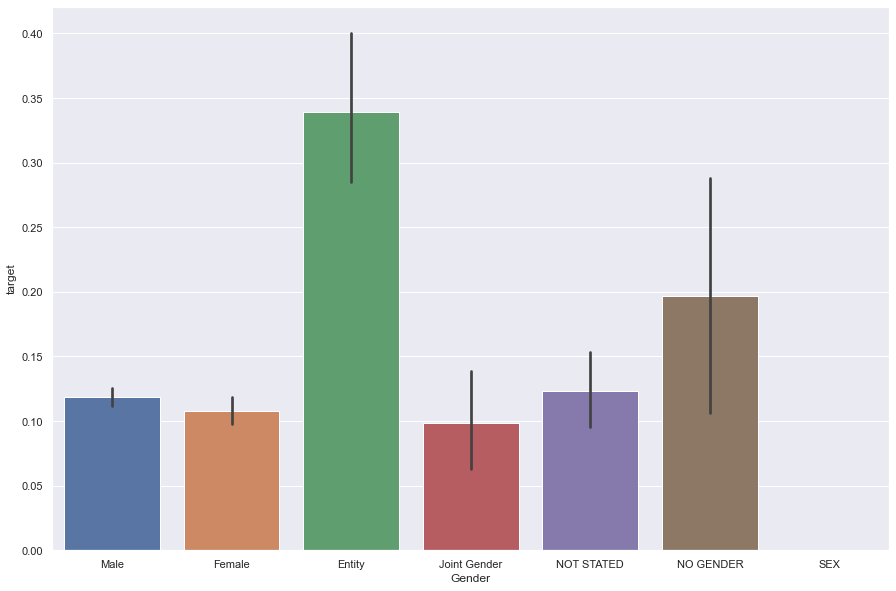

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Gender', y='target', data=data)

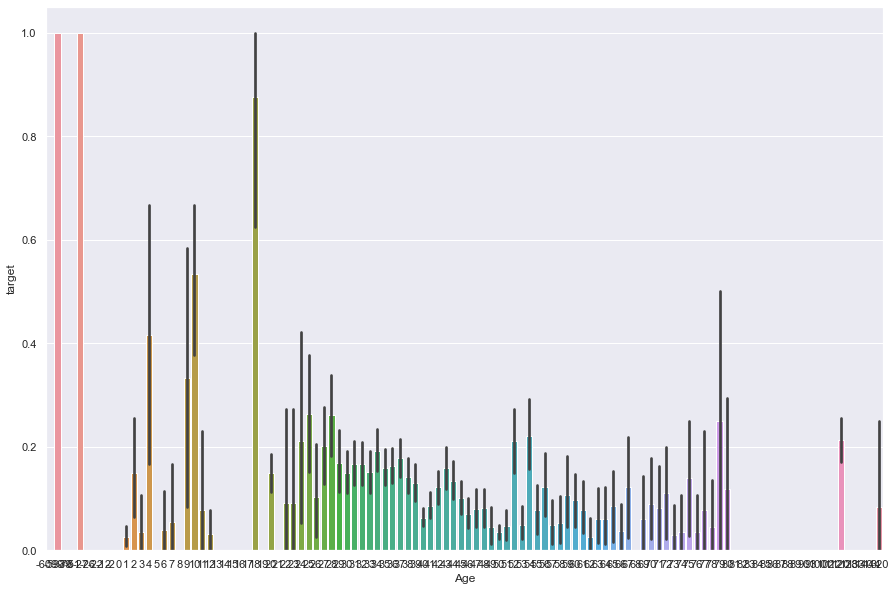

In [25]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Age', y='target', data=data)

# Feature Engineering

## creating features that speak to the risk associated with the individual themselves using
- Age
- Gender
- Number of policies (We can create a separate colum from this that identifies wether or not each customer has more than one policies)

# We also need to create features that would speak to the 
- Risk depending on the type of vehicle being insured (Car Category)
- Type of Insurance (ProductName)

In [26]:
# Fixing the age column as it contains a lot of illegal values

def fix_age(x):
    if x < 18:
        return 0
    elif x >= 18 and x <20:
        return 1
    elif x >=20 and x < 30:
        return 2
    elif x >= 30 and x < 40:
        return 3
    elif x >= 40 and x < 50:
        return 4
    elif x >= 50 and x < 60:
        return 5
    elif x >= 60 and x < 70:
        return 6
    elif x >= 70 and x < 80:
        return 7
    elif x >=80:
        return 8
    
data['Age'] = data['Age'].apply(fix_age)

In [27]:
data['Age'].value_counts()

3    5492
4    5152
5    2485
2    1157
6    1035
0     802
8     678
7     423
1      32
Name: Age, dtype: int64

In [28]:
def convert(x):
    

    load = ['Tipper Truck', 'Pick Up > 3 Tons', 'Wagon', 'Van', 'Truck']
    people = ['Saloon', 'Motorcycle', 'JEEP', 'Mini Van', 'CAMRY CAR HIRE', 'Sedan', 'Bus', 'Mini Bus']
    both = ['Station 4 Wheel', 'Pick Up']
    body = ['Shape Of Vehicle Chasis']
    unknown = ['Unknown']
    
    if x in load:
        return 1.0
    elif x in people:
        return 2.0
    elif x in both:
        return 3.0
    elif x in body:
        return 4.0
    elif x in unknown:
        return 0.0

data['Cargo'] = data['Car_Category'].apply(convert)

In [29]:
def sizze(x):
    
    small = ['Motorcycle']
    medium = ['Saloon', 'Sedan', 'Shape Of Vehicle Chasis', 'CAMRY CAR HIRE', ]
    large = ['JEEP', 'Mini Van',  'Mini Bus', 'Pick Up', 'Wagon']
    extra_large = ['Van', 'Truck', 'Pick Up > 3 Tons', 'Tipper Truck', 'Bus', 'Station 4 Wheel']
    unknown = ['Unknown']
    
    if x in small:
        return 1.0
    if x in medium:
        return 2.0
    if x in large:
        return 3.0
    if x in extra_large:
        return 4.0
    
    if x in unknown:
        return 0.0
    
data['Size'] = data['Car_Category'].apply(sizze)

In [30]:
data['Size'].isna().sum()

0

In [31]:
data['No_Pol'].value_counts()

1     13685
2      2399
3       795
4       299
5        33
7        24
6        11
10       10
Name: No_Pol, dtype: int64

In [32]:
def risk(x):
    if x <= 1:
        return 0
    else:
        return x
data['Higher Risk'] = data['No_Pol'].apply(risk)

In [33]:
data['Higher Risk'].value_counts()

0     13685
2      2399
3       795
4       299
5        33
7        24
6        11
10       10
Name: Higher Risk, dtype: int64

In [34]:
data['Black'] = data['Subject_Car_Colour'].apply(lambda x: 1 if x=='Black' else 0)

In [35]:
data.columns

Index(['Age', 'Car_Category', 'First Transaction Date', 'Gender', 'ID',
       'LGA_Name', 'No_Pol', 'Policy End Date', 'Policy Start Date',
       'ProductName', 'State', 'Subject_Car_Colour', 'Subject_Car_Make',
       'target', 'Cargo', 'Size', 'Higher Risk', 'Black'],
      dtype='object')

# One Hot Encoding

In [36]:
#data = pd.get_dummies(data, columns=['Age'])
#data = pd.get_dummies(data, columns=['Subject_Car_Colour'])
#data = pd.get_dummies(data, columns=['Subject_Car_Make'])
data = pd.get_dummies(data, columns=['Size'])
data = pd.get_dummies(data, columns=['Cargo'])
data = pd.get_dummies(data, columns=['Black'])
data = pd.get_dummies(data, columns=['Higher Risk'])
data = pd.get_dummies(data, columns= ['Car_Category'])
data = pd.get_dummies(data, columns=['Gender'])
data = pd.get_dummies(data, columns=['ProductName'])

# Categorical Encoder

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [38]:
cat_col

['ID',
 'Gender',
 'No_Pol',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [39]:
data.columns

Index(['Age', 'First Transaction Date', 'ID', 'LGA_Name', 'No_Pol',
       'Policy End Date', 'Policy Start Date', 'State', 'Subject_Car_Colour',
       'Subject_Car_Make', 'target', 'Size_1.0', 'Size_2.0', 'Size_3.0',
       'Size_4.0', 'Cargo_1.0', 'Cargo_2.0', 'Cargo_3.0', 'Cargo_4.0',
       'Black_0', 'Black_1', 'Higher Risk_0', 'Higher Risk_2', 'Higher Risk_3',
       'Higher Risk_4', 'Higher Risk_5', 'Higher Risk_6', 'Higher Risk_7',
       'Higher Risk_10', 'Car_Category_Bus', 'Car_Category_CAMRY CAR HIRE',
       'Car_Category_JEEP', 'Car_Category_Mini Bus', 'Car_Category_Mini Van',
       'Car_Category_Motorcycle', 'Car_Category_Pick Up',
       'Car_Category_Pick Up > 3 Tons', 'Car_Category_Saloon',
       'Car_Category_Sedan', 'Car_Category_Shape Of Vehicle Chasis',
       'Car_Category_Station 4 Wheel', 'Car_Category_Tipper Truck',
       'Car_Category_Truck', 'Car_Category_Van', 'Car_Category_Wagon',
       'Gender_Entity', 'Gender_Female', 'Gender_Joint Gender', 'Gender_

In [40]:
cat_col = ['ID',
 'No_Pol','Subject_Car_Colour',
 'LGA_Name','Subject_Car_Make',
 'State']

encoder = LabelEncoder()

for col in cat_col:
    
    data[col] = encoder.fit_transform(data[col])

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 61 columns):
Age                                     17256 non-null int64
First Transaction Date                  17256 non-null object
ID                                      17256 non-null int32
LGA_Name                                17256 non-null int32
No_Pol                                  17256 non-null int64
Policy End Date                         17256 non-null object
Policy Start Date                       17256 non-null object
State                                   17256 non-null int32
Subject_Car_Colour                      17256 non-null int32
Subject_Car_Make                        17256 non-null int32
target                                  12079 non-null float64
Size_1.0                                17256 non-null uint8
Size_2.0                                17256 non-null uint8
Size_3.0                                17256 non-null uint8
Size_4.0                        

In [42]:
# Convert to datatime features

data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'])
data['Policy End Date'] = pd.to_datetime(data['Policy End Date'])

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 61 columns):
Age                                     17256 non-null int64
First Transaction Date                  17256 non-null object
ID                                      17256 non-null int32
LGA_Name                                17256 non-null int32
No_Pol                                  17256 non-null int64
Policy End Date                         17256 non-null datetime64[ns]
Policy Start Date                       17256 non-null datetime64[ns]
State                                   17256 non-null int32
Subject_Car_Colour                      17256 non-null int32
Subject_Car_Make                        17256 non-null int32
target                                  12079 non-null float64
Size_1.0                                17256 non-null uint8
Size_2.0                                17256 non-null uint8
Size_3.0                                17256 non-null uint8
Size_4.0        

# Expanding the date time objects, additional feature creation

In [44]:
# Start
data['start day'] = data['Policy Start Date'].dt.day
data['start month'] = data['Policy Start Date'].dt.month
data['start year'] = data['Policy Start Date'].dt.year

# End
data['end day'] = data['Policy End Date'].dt.day
data['end month'] = data['Policy End Date'].dt.month
data['end year'] = data['Policy End Date'].dt.year

In [45]:
data['end year'].value_counts()

2011    16997
2010      250
2012        3
2041        2
2016        2
2037        1
2034        1
Name: end year, dtype: int64

In [46]:
data['start year'].value_counts()

2010    17241
2009        7
2006        2
2003        2
2007        1
2005        1
2002        1
2001        1
Name: start year, dtype: int64

In [47]:
# Caution

data['day'] = data['end day'] - data['start day']
data['month'] = data['end month'] - data['start month']
data['year'] = data['end year'] - data['start year']

#data.drop(['end day', 'end month', 'end year', 'start day', 'start year', 'start month'], axis=1, inplace=True)

In [48]:
data.head()

,Age,First Transaction Date,ID,LGA_Name,No_Pol,Policy End Date,Policy Start Date,State,Subject_Car_Colour,Subject_Car_Make,...,ProductName_Muuve,start day,start month,start year,end day,end month,end year,day,month,year
0,3,2010-05-14,0,258,0,2011-05-13,2010-05-14,74,4,68,...,0,14,5,2010,13,5,2011,-1,0,1
1,7,2010-11-29,1,258,0,2011-11-28,2010-11-29,74,26,68,...,0,29,11,2010,28,11,2011,-1,0,1
2,4,2010-03-21,2,258,0,2011-03-20,2010-03-21,74,32,68,...,0,21,3,2010,20,3,2011,-1,0,1
3,0,2010-08-21,3,258,0,2011-08-20,2010-08-21,74,4,68,...,0,21,8,2010,20,8,2011,-1,0,1
4,2,2010-08-29,5,165,2,2010-12-31,2010-08-29,74,4,68,...,1,29,8,2010,31,12,2010,2,4,0


In [49]:
data.drop(['First Transaction Date', 'No_Pol','Policy End Date', 'Policy Start Date', 'ID'], axis=1, inplace=True)
# data.drop(['First Transaction Date', 'Policy End Date', 'Policy Start Date', 'LGA_Name', 'ID'], axis=1, inplace=True)

# Exploratory Data Analysis

In [50]:
#plt.figure(figsize=(20,15))

#sns.heatmap(data.corr(), cmap='coolwarm')

In [51]:
data.head(10)

,Age,LGA_Name,State,Subject_Car_Colour,Subject_Car_Make,target,Size_1.0,Size_2.0,Size_3.0,Size_4.0,...,ProductName_Muuve,start day,start month,start year,end day,end month,end year,day,month,year
0,3,258,74,4,68,0.0,0,1,0,0,...,0,14,5,2010,13,5,2011,-1,0,1
1,7,258,74,26,68,1.0,0,0,1,0,...,0,29,11,2010,28,11,2011,-1,0,1
2,4,258,74,32,68,0.0,0,1,0,0,...,0,21,3,2010,20,3,2011,-1,0,1
3,0,258,74,4,68,0.0,0,1,0,0,...,0,21,8,2010,20,8,2011,-1,0,1
4,2,165,74,4,68,1.0,0,1,0,0,...,1,29,8,2010,31,12,2010,2,4,0
5,3,258,74,4,68,0.0,0,1,0,0,...,0,21,10,2010,20,10,2011,-1,0,1
6,4,123,74,4,68,0.0,0,1,0,0,...,0,2,8,2010,1,8,2011,-1,0,1
7,4,258,74,4,68,0.0,0,1,0,0,...,0,12,9,2010,11,9,2011,-1,0,1
8,7,52,23,4,58,0.0,0,0,1,0,...,0,6,7,2010,5,7,2011,-1,0,1
9,5,89,39,4,68,0.0,0,1,0,0,...,0,18,12,2010,17,12,2011,-1,0,1


In [52]:
data['target'].value_counts()

0.0    10624
1.0     1455
Name: target, dtype: int64

# Spliting and Scaling the data

In [53]:
train = data.iloc[0:12079, :]
test = data.iloc[12079:, :].drop('target', axis=1)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 65 columns):
Age                                     12079 non-null int64
LGA_Name                                12079 non-null int32
State                                   12079 non-null int32
Subject_Car_Colour                      12079 non-null int32
Subject_Car_Make                        12079 non-null int32
target                                  12079 non-null float64
Size_1.0                                12079 non-null uint8
Size_2.0                                12079 non-null uint8
Size_3.0                                12079 non-null uint8
Size_4.0                                12079 non-null uint8
Cargo_1.0                               12079 non-null uint8
Cargo_2.0                               12079 non-null uint8
Cargo_3.0                               12079 non-null uint8
Cargo_4.0                               12079 non-null uint8
Black_0                            

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 12079 to 17255
Data columns (total 64 columns):
Age                                     5177 non-null int64
LGA_Name                                5177 non-null int32
State                                   5177 non-null int32
Subject_Car_Colour                      5177 non-null int32
Subject_Car_Make                        5177 non-null int32
Size_1.0                                5177 non-null uint8
Size_2.0                                5177 non-null uint8
Size_3.0                                5177 non-null uint8
Size_4.0                                5177 non-null uint8
Cargo_1.0                               5177 non-null uint8
Cargo_2.0                               5177 non-null uint8
Cargo_3.0                               5177 non-null uint8
Cargo_4.0                               5177 non-null uint8
Black_0                                 5177 non-null uint8
Black_1                                 5177 non

# Fixing the class imbalance

In [56]:
X_train = train.drop(['target'], axis=1).copy()
y_train = train['target'].copy()

In [57]:
X_train.shape, y_train.shape

((12079, 64), (12079,))

In [58]:
y_train

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       1.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       1.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
12049    0.0
12050    0.0
12051    0.0
12052    0.0
12053    0.0
12054    0.0
12055    0.0
12056    0.0
12057    0.0
12058    0.0
12059    0.0
12060    0.0
12061    0.0
12062    1.0
12063    0.0
12064    0.0
12065    0.0
12066    0.0
12067    0.0
12068    0.0
12069    0.0
12070    1.0
12071    0.0
12072    0.0
12073    0.0
12074    1.0
12075    0.0
12076    0.0
12077    0.0
12078    0.0
Name: target, Length: 12079, dtype: float64

In [59]:
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, RandomOverSampler, SMOTE

os = RandomOverSampler(0.5, random_state=10)
print(X_train.shape, y_train.shape)
X_train, y_train = os.fit_sample(X_train, y_train)
print(X_train.shape, y_train.shape)

(12079, 64) (12079,)
(15936, 64) (15936,)


C:\Users\Chizurum_Olorondu\anaconda3\envs\tf_gpu\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [61]:
#X_train = StandardScaler().fit_transform(X_train)
#test = StandardScaler().fit_transform(test)

# Feature Selection

In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import VarianceThreshold


# Models

In [63]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
'''from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=10)

for train_index, test_index in ss.split(X_train, y_train):
    X_train, X_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = y_train.iloc[train_index], y_train.iloc[test_index]'''

'from sklearn.model_selection import StratifiedShuffleSplit\n\nss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=10)\n\nfor train_index, test_index in ss.split(X_train, y_train):\n    X_train, X_test = X_train.iloc[train_index], X_train.iloc[test_index]\n    y_train, y_test = y_train.iloc[train_index], y_train.iloc[test_index]'

In [65]:
from sklearn.metrics import f1_score

In [66]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

#model = RandomForestClassifier(random_state=10)
#model =  RFECV(RandomForestClassifier(random_state=10, verbose=5), scoring='f1')
#m = SelectFromModel(RandomForestClassifier(random_state=10))


#m.fit(X_train, y_train)
#X_train = m.transform(X_train)
#print(X_train.head)

model = RandomForestClassifier(n_estimators=1000, random_state=10)
model.fit(X_train, y_train)

#pred1 = model.predict(X_test)
pred = model.predict(test)

In [67]:
#print(f1_score(pred1, y_test))

In [68]:
submit.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [69]:
submit.target = pred

In [70]:
submit.head()

,ID,target
0,009D84L,1.0
1,01DO2EQ,1.0
2,01QM0NU,0.0
3,024NJLZ,0.0
4,02BYET3,1.0


In [71]:
ss = submit.copy()

In [72]:
ss.to_csv('5th submission.csv', index=False)